In [2]:
# import duckdb
import pandas as pd
# No need to import duckdb_engine
#  jupysql will auto-detect the driver needed based on the connection string!

# Import jupysql Jupyter extension to create SQL cells
%reload_ext sql
%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%sql duckdb:///:default:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
# Plot display settings
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.dpi'] = 300
matplotlib.rcParams['font.family'] = ['Inter', 'sans-serif']

pd.set_option('display.max_colwidth', 3000)
pd.set_option("display.max_columns", None)

# Analyzing data about the players

In [61]:
%sql top_schools << SELECT school, count(*) as count FROM read_csv_auto('../archive/csv/common_player_info.csv') AS common_player_info GROUP BY school ORDER BY count DESC LIMIT 40;
top_schools: pd.DataFrame

In [62]:
top_schools

,school,count
0,Kentucky,62
1,North Carolina,52
2,UCLA,50
3,Duke,42
4,Kansas,41
5,,33
6,Louisville,31
7,Indiana,29
8,Syracuse,28
9,Arizona,27


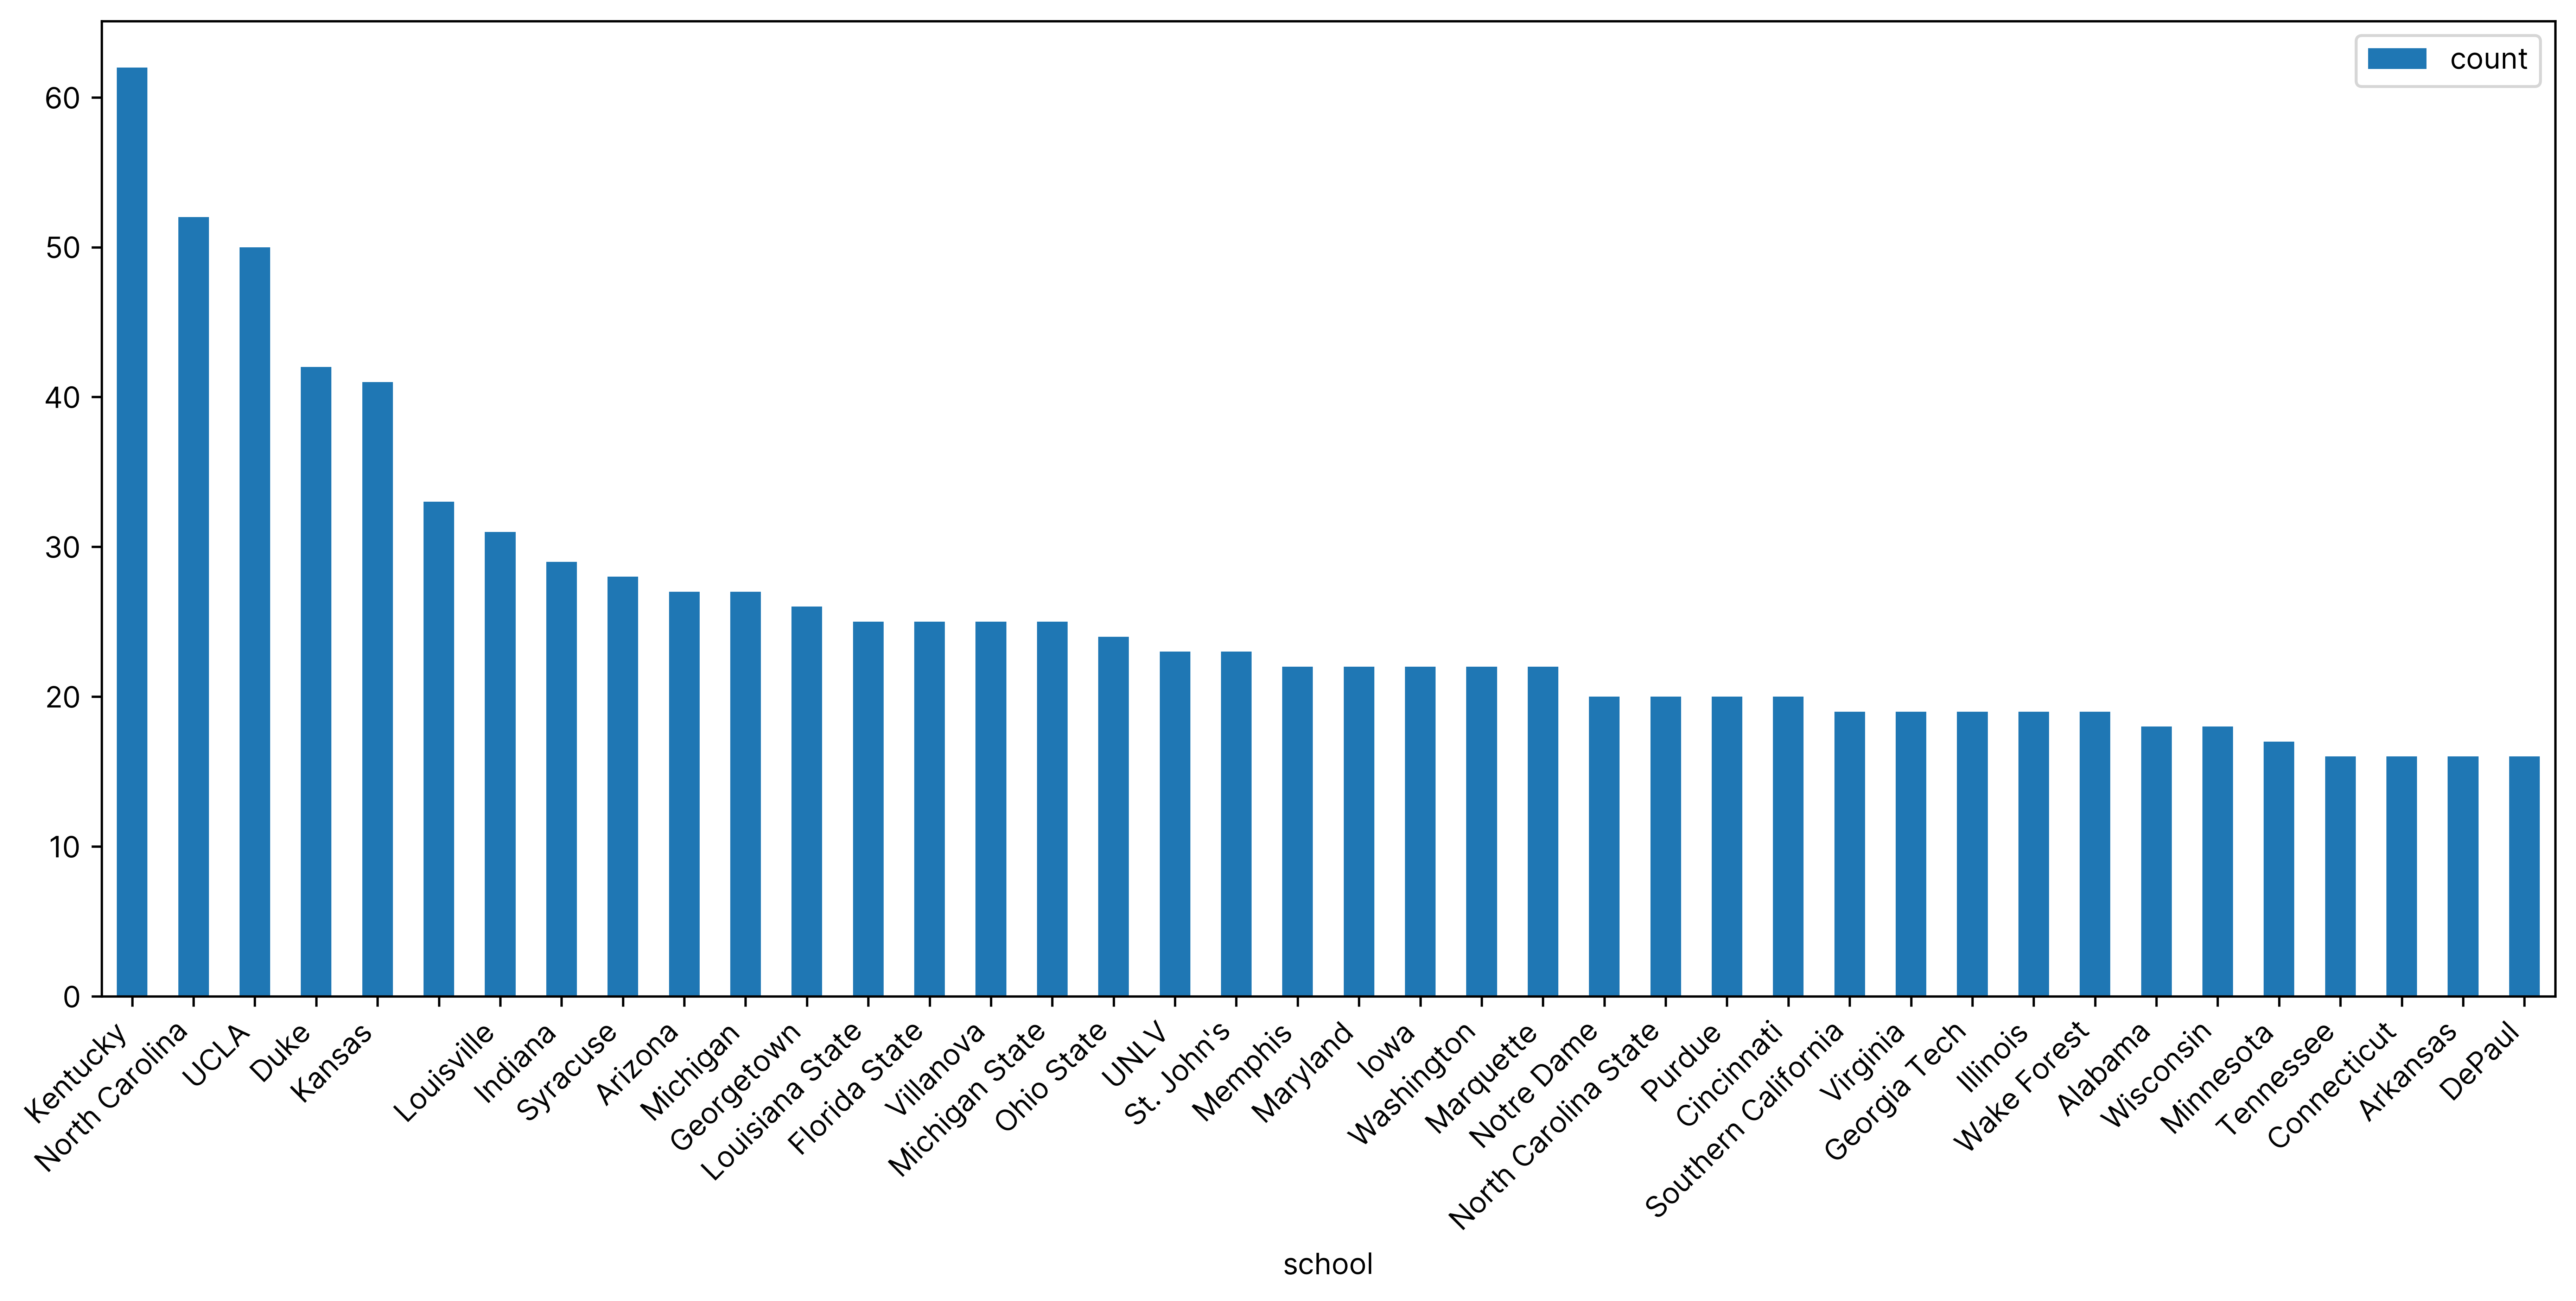

In [63]:
top_schools.plot.bar(x='school', y='count', rot=0, figsize=(15,6))

plt.xticks(rotation = 45, ha="right")
plt.show()

In [109]:
%sql heights << SELECT height, count(*) as count FROM read_csv_auto('../archive/csv/common_player_info.csv') AS common_player_info GROUP BY height ORDER BY height;
heights: pd.DataFrame

In [113]:
heights


,height,count
0,5-10,25
1,5-11,30
2,5-6,1
3,5-7,4
4,5-8,2
5,5-9,8
6,6-0,68
7,6-1,114
8,6-10,169
9,6-11,118


In [124]:

# parse height with format 6-10 to inches and add it as column

def parse_height(height):
    # if height is float, return it
    if isinstance(height, float):
        return height
   

    height = height.split('-')
    return int(height[0]) * 12 + int(height[1])


# filter out nAn

heights = heights[heights['height'].notna()]


heights['inches'] = heights['height'].apply(parse_height)

# order by inches
heights = heights.sort_values(by=['inches'])

heights


,height,count,inches
2,5-6,1,66
3,5-7,4,67
4,5-8,2,68
5,5-9,8,69
0,5-10,25,70
1,5-11,30,71
6,6-0,68,72
7,6-1,114,73
10,6-2,161,74
11,6-3,202,75


<AxesSubplot:xlabel='height'>

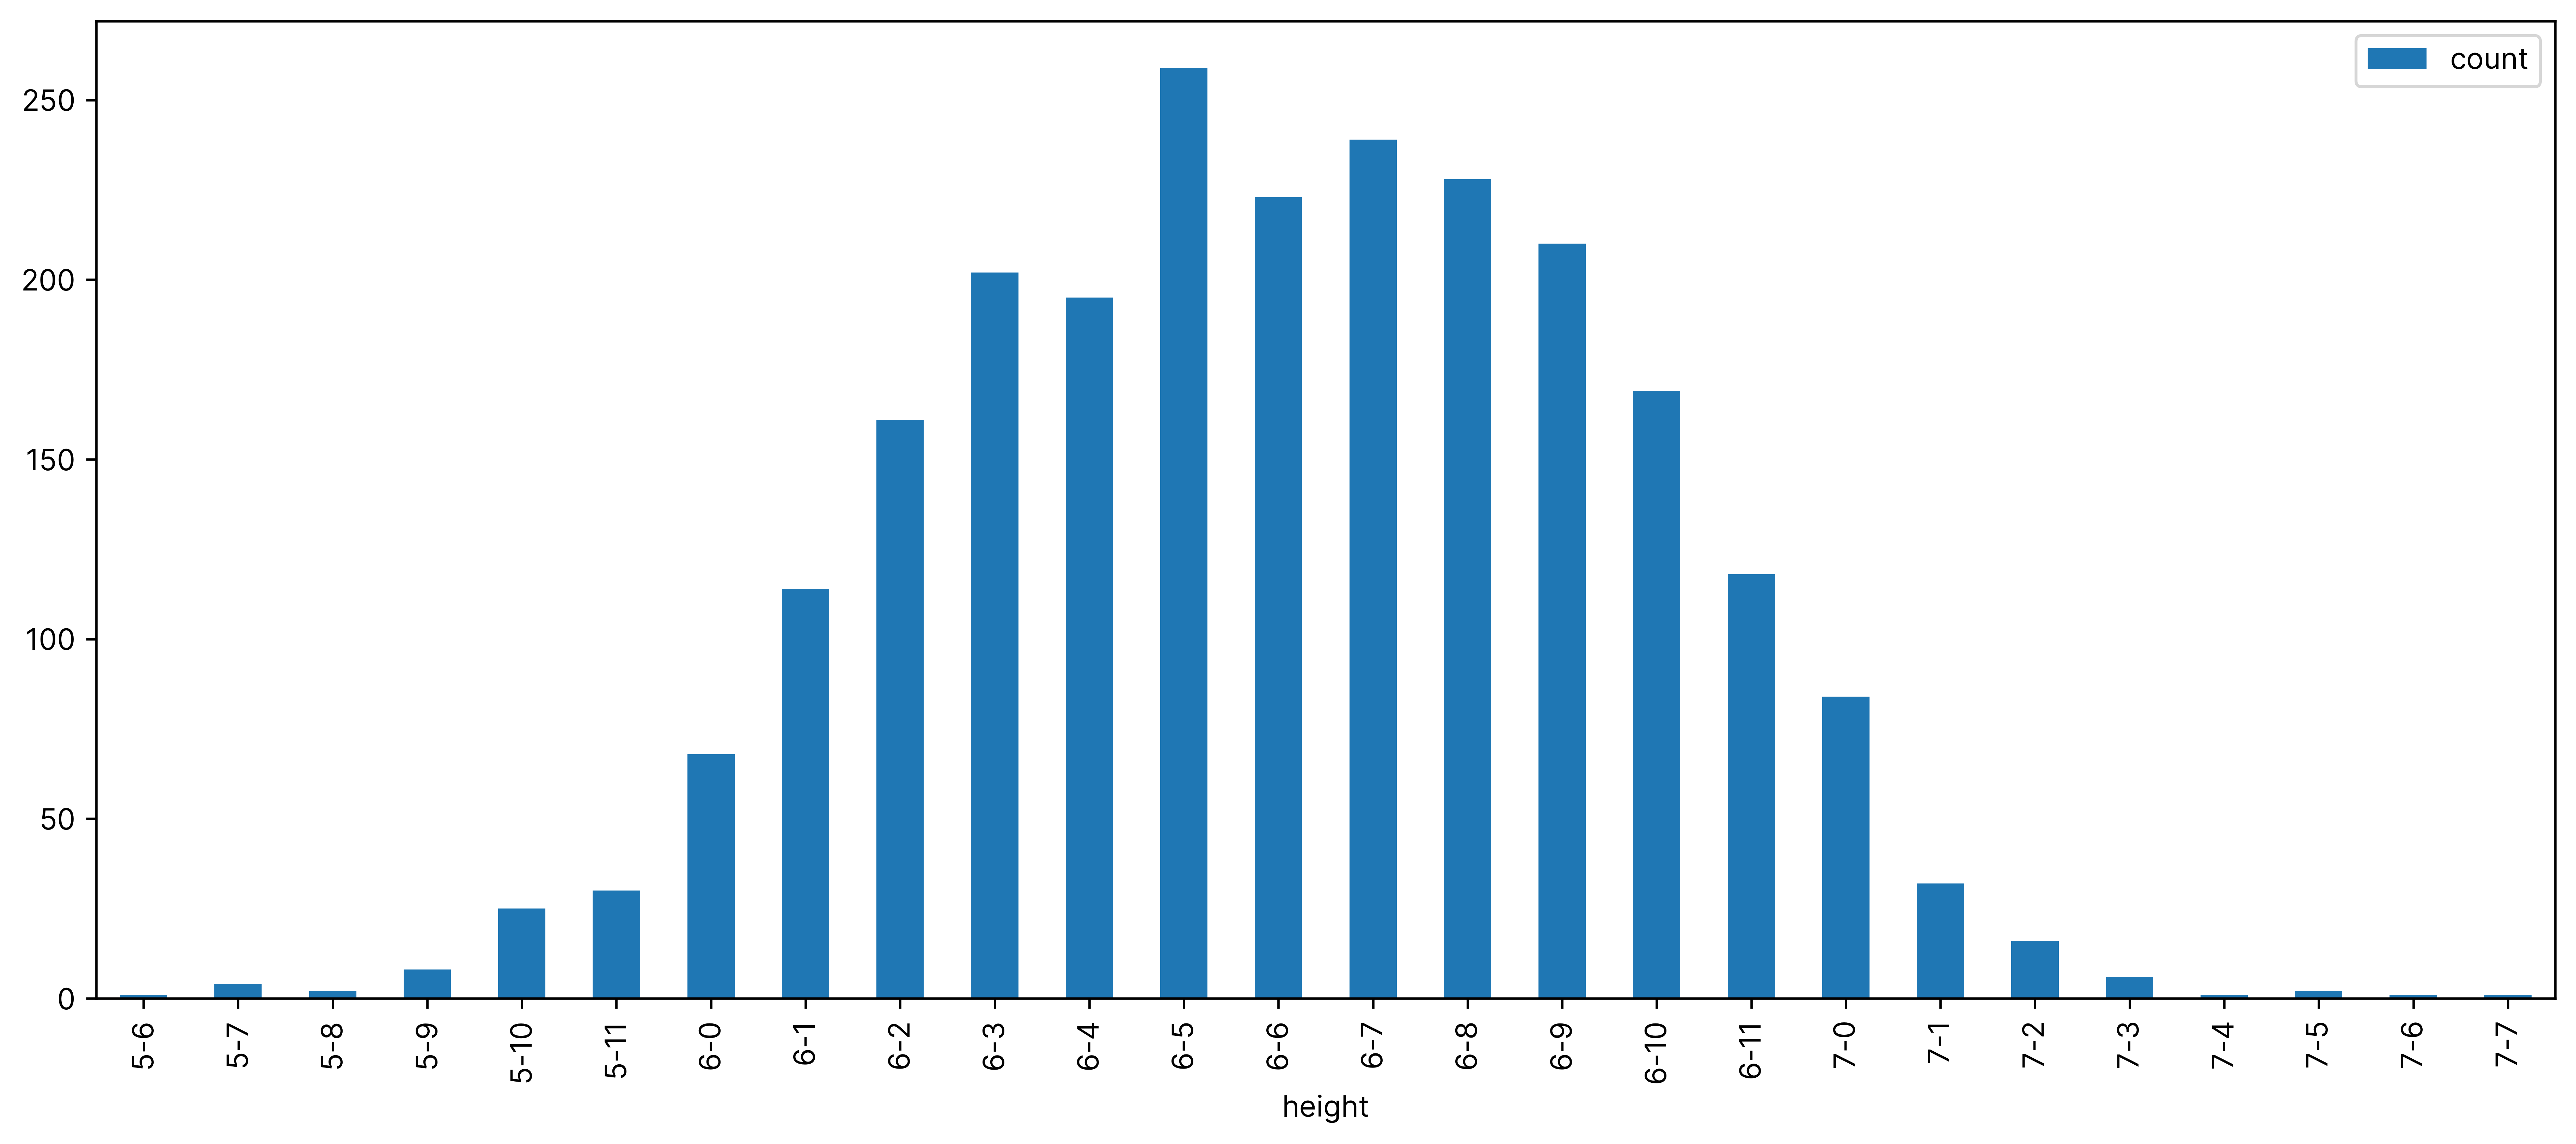

In [130]:
heights.plot.bar(x="height", y="count", figsize=(15,6))

In [14]:
%sql playerss << SELECT display_first_last, birthdate, school, country, height, weight, jersey, position, team_name, from_year, to_year FROM read_csv_auto('../archive/csv/common_player_info.csv') AS common_player_info WHERE greatest_75_flag = 'Y' ;
playerss: pd.DataFrame
playerss

,display_first_last,birthdate,school,country,height,weight,jersey,position,team_name,from_year,to_year
0,Rick Barry,1944-03-28,Miami,USA,6-7,205,24,Forward,Warriors,1965.0,1979.0
1,Elgin Baylor,1934-09-16,Seattle,USA,6-5,225,22,Forward,Lakers,1958.0,1971.0
2,Larry Bird,1956-12-07,Indiana State,USA,6-9,220,33,Forward,Celtics,1979.0,1991.0
3,Dave Cowens,1948-10-25,Florida State,USA,6-9,230,18,Center,Celtics,1970.0,1982.0
4,Anthony Davis,1993-03-11,Kentucky,USA,6-10,253,3,Forward-Center,Lakers,2012.0,2022.0
5,Walt Frazier,1945-03-29,Southern Illinois,USA,6-4,200,10,Guard,Knicks,1967.0,1979.0
6,James Harden,1989-08-26,Arizona State,USA,6-5,220,1,Guard,76ers,2009.0,2022.0
7,John Havlicek,1940-04-08,Ohio State,USA,6-5,203,17,Forward,Celtics,1962.0,1977.0
8,LeBron James,1984-12-30,St. Vincent-St. Mary HS (OH),USA,6-9,250,6,Forward,Lakers,2003.0,2022.0
9,Magic Johnson,1959-08-14,Michigan State,USA,6-9,220,32,Forward-Guard,Lakers,1979.0,1995.0
